In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\TRADES_CopyTr_90D_ROI.csv')

In [3]:
df.head()

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [4]:
import ast

In [5]:
# Ensure Trade_History is parsed from strings to Python objects
df['Trade_History'] = df['Trade_History'].dropna().apply(ast.literal_eval)

# Expand Trade_History into a structured DataFrame
expanded_data = df.explode('Trade_History')  # Split list into rows
expanded_data = expanded_data.reset_index(drop=True)

# Extract details from each trade into individual columns
expanded_data = pd.concat(
    [expanded_data.drop(columns=['Trade_History']),
     pd.json_normalize(expanded_data['Trade_History'])],
    axis=1
)

# Display the first few rows of the expanded DataFrame
print(expanded_data.head())

# Save to CSV for reference
expanded_data.to_csv('expanded_trade_history.csv', index=False)

              Port_IDs          time    symbol side      price       fee  \
0  3925368433214965504  1.718900e+12   SOLUSDT  BUY  132.53700 -0.994027   
1  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.279796   
2  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.039494   
3  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.008284   
4  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.046109   

  feeAsset    quantity quantityAsset  realizedProfit realizedProfitAsset  \
0     USDT  1988.05500          USDT             0.0                USDT   
1     USDT  1398.98088          USDT             0.0                USDT   
2     USDT   197.47022          USDT             0.0                USDT   
3     USDT    16.56752          USDT             0.0                USDT   
4     USDT    92.21774          USDT             0.0                USDT   

  baseAsset      qty positionSide activeBuy  
0       SOL     15.0         LONG      T

In [6]:
original_data = df[['Port_IDs']]

# Merge the original data with the expanded data on Port_IDs
merged_data = pd.merge(original_data, expanded_data, on='Port_IDs', how='right')

# Display the first few rows of the merged DataFrame
print(merged_data.head())

# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_trade_history.csv', index=False)


              Port_IDs          time    symbol side      price       fee  \
0  3925368433214965504  1.718900e+12   SOLUSDT  BUY  132.53700 -0.994027   
1  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.279796   
2  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.039494   
3  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.008284   
4  3925368433214965504  1.718900e+12  DOGEUSDT  BUY    0.12182 -0.046109   

  feeAsset    quantity quantityAsset  realizedProfit realizedProfitAsset  \
0     USDT  1988.05500          USDT             0.0                USDT   
1     USDT  1398.98088          USDT             0.0                USDT   
2     USDT   197.47022          USDT             0.0                USDT   
3     USDT    16.56752          USDT             0.0                USDT   
4     USDT    92.21774          USDT             0.0                USDT   

  baseAsset      qty positionSide activeBuy  
0       SOL     15.0         LONG      T

In [7]:
merged_data.head()

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1.718900e+12,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


In [8]:
merged_data.shape

(211278, 15)

In [9]:
merged_data.isna().sum()

Port_IDs               0
time                   1
symbol                 1
side                   1
price                  1
fee                    1
feeAsset               1
quantity               1
quantityAsset          1
realizedProfit         1
realizedProfitAsset    1
baseAsset              1
qty                    1
positionSide           1
activeBuy              1
dtype: int64

In [10]:
merged_data.dropna(axis=0,inplace=True)

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211277 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_IDs             211277 non-null  int64  
 1   time                 211277 non-null  float64
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  object 
dtypes: float64(6), in

In [12]:
# Handle missing and incorrect values
# Drop rows with missing time values and convert to datetime format
merged_data = merged_data.dropna(subset=['time'])
merged_data['time'] = pd.to_datetime(merged_data['time'], unit='ms')

In [13]:
# Ensure 'realizedProfit' is numeric
merged_data['realizedProfit'] = pd.to_numeric(merged_data['realizedProfit'], errors='coerce').fillna(0)

In [14]:
# Convert 'activeBuy' to boolean
merged_data['activeBuy'] = merged_data['activeBuy'].astype(str).str.lower().map({'true': True, 'false': False}).fillna(False)

In [15]:
# Feature Engineering: Classify trades using 'side' and 'positionSide'
merged_data['trade_type'] = merged_data['side'] + '_' + merged_data['positionSide']

In [16]:
# Define metrics calculation functions
def calculate_metrics(group):
    # Total profit and loss (PnL)
    pnl = group['realizedProfit'].sum()
    
    
    # ROI: Total realized profit / Total invested capital
    total_invested = group.loc[group['side'] == 'BUY', 'quantity'].sum()
    roi = (pnl / total_invested) if total_invested > 0 else 0
    
    # Maximum Drawdown (MDD)
    cumulative_pnl = group['realizedProfit'].cumsum()
    running_max = cumulative_pnl.cummax()
    drawdown = cumulative_pnl - running_max
    mdd = drawdown.min()
    
    # Sharpe Ratio (Assuming 0 risk-free rate)
    mean_pnl = group['realizedProfit'].mean()
    std_pnl = group['realizedProfit'].std()
    sharpe_ratio = (mean_pnl / std_pnl) if std_pnl > 0 else 0
    
    # Win Rate and Total Positions
    win_positions = (group['realizedProfit'] > 0).sum()
    total_positions = len(group)
    win_rate = (win_positions / total_positions) if total_positions > 0 else 0
    
    return pd.Series({
        'PnL': pnl,
        'ROI': roi,
        'Sharpe_Ratio': sharpe_ratio,
        'MDD': mdd,
        'Win_Rate': win_rate,
        'Win_Positions': win_positions,
        'Total_Positions': total_positions
    })

In [17]:
# Group by Port_IDs and calculate metrics
account_metrics = merged_data.groupby('Port_IDs').apply(calculate_metrics).reset_index()

In [18]:
# Ranking Algorithm with Weighted Scoring System
weights = {'ROI': 0.4, 'Sharpe_Ratio': 0.2, 'Win_Rate': 0.2, 'MDD': -0.1, 'PnL': 0.1}
account_metrics['Score'] = (
    account_metrics['ROI'] * weights['ROI'] +
    account_metrics['Sharpe_Ratio'] * weights['Sharpe_Ratio'] +
    account_metrics['Win_Rate'] * weights['Win_Rate'] +
    account_metrics['MDD'] * weights['MDD'] +
    account_metrics['PnL'] * weights['PnL']
)
account_metrics['Rank'] = account_metrics['Score'].rank(ascending=False, method='min')


In [19]:
# Get the top 20 accounts
top_20_accounts = account_metrics.sort_values(by='Rank').head(20)
print(top_20_accounts)

                Port_IDs           PnL       ROI  Sharpe_Ratio           MDD  \
96   4020204877254599680  71998.855953  0.006336      0.060748 -21338.051188   
75   3999240873283311617  42574.473679  0.010933      0.227505   -300.813848   
98   4021669203289716224  26427.331592  0.008121      0.068251  -2537.866629   
50   3960874214179953664  19567.471286  0.004592      0.162948  -2234.000000   
17   3907081197088384000  18015.997370  0.021915      0.222729  -2060.707122   
107  4028701921959171840  17601.401398  0.007986      0.275724   -585.677600   
48   3956076827719377409  16790.012238  0.020143      0.099528   -635.050015   
62   3986814617275053313  16337.461881  0.016860      0.329787     -2.381947   
63   3987739404272887297  12464.606315  0.011167      0.049883  -3386.656094   
5    3788465932399412480  13960.966457  0.016537      0.152912  -1772.219440   
99   4022565861939831809  14197.577076  0.004693      0.299602   -385.075554   
78   4000877324693233921   -836.100559 -

In [24]:
# Save metrics and top accounts to CSV files
account_metrics.to_csv(r'C:\Users\Dell\Downloads\account_metrics.csv', index=False)
top_20_accounts.to_csv(r'C:\Users\Dell\Downloads\top_20_accounts.csv', index=False)

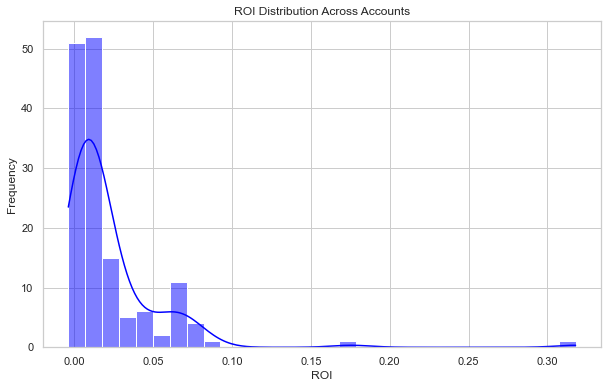

In [20]:
# Visualization
sns.set(style="whitegrid")

# ROI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(account_metrics['ROI'], bins=30, kde=True, color='blue')
plt.title('ROI Distribution Across Accounts')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

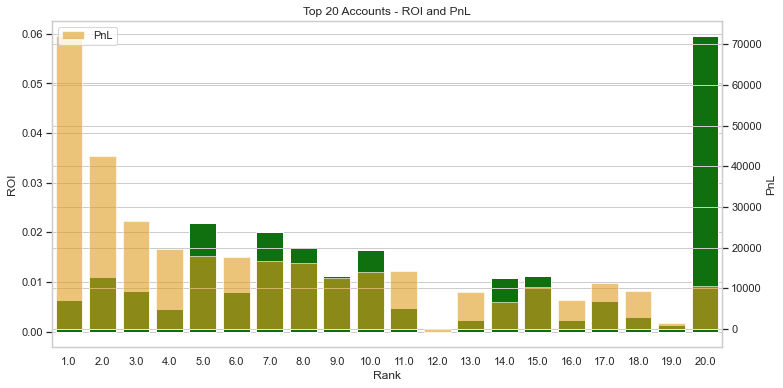

In [21]:
# Top 20 Accounts - ROI and PnL
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_accounts, x='Rank', y='ROI', color='green', label='ROI')
plt.ylabel('ROI')
plt.twinx()
sns.barplot(data=top_20_accounts, x='Rank', y='PnL', color='orange', alpha=0.6, label='PnL')
plt.ylabel('PnL')
plt.title('Top 20 Accounts - ROI and PnL')
plt.legend(loc='upper left')
plt.show()

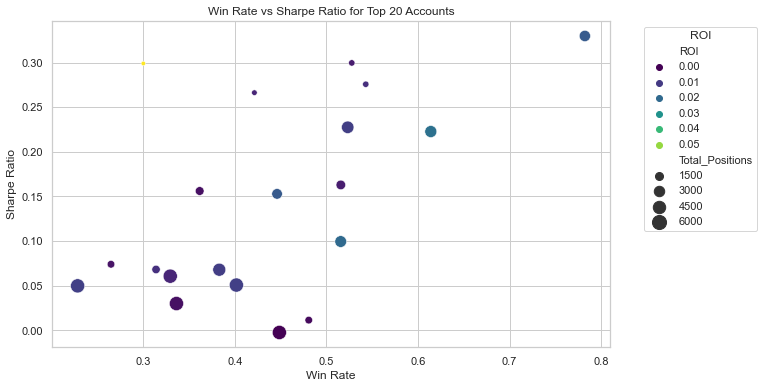

In [22]:
# Win Rate vs Sharpe Ratio for Top 20
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20_accounts, x='Win_Rate', y='Sharpe_Ratio', size='Total_Positions', hue='ROI', palette='viridis', sizes=(20, 200))
plt.title('Win Rate vs Sharpe Ratio for Top 20 Accounts')
plt.xlabel('Win Rate')
plt.ylabel('Sharpe Ratio')
plt.legend(title='ROI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## 